[![Labellerr](https://storage.googleapis.com/labellerr-cdn/%200%20Labellerr%20template/notebook.webp)](https://www.labellerr.com)

# **AI-Based Anomaly Detection for Robbery Using Computer Vision**

---

[![labellerr](https://img.shields.io/badge/Labellerr-BLOG-black.svg)](https://www.labellerr.com/blog/<BLOG_NAME>)
[![Youtube](https://img.shields.io/badge/Labellerr-YouTube-b31b1b.svg)](https://www.youtube.com/@Labellerr)
[![Github](https://img.shields.io/badge/Labellerr-GitHub-green.svg)](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)
[![Scientific Paper](https://img.shields.io/badge/Official-Paper-blue.svg)](<PAPER LINK>)

## Annotate your Custom dataset using Labellerr

 ***1. Visit the [Labellerr](https://www.labellerr.com/?utm_source=githubY&utm_medium=social&utm_campaign=github_clicks) website and click **“Sign Up”**.*** 

 ***2. After signing in, create your workspace by entering a unique name.***

 ***3. Navigate to your workspace’s API keys page (e.g., `https://<your-workspace>.labellerr.com/workspace/api-keys`) to generate your **API Key** and **API Secret**.***

 ***4. Store the credentials securely, and then use them to initialise the SDK or API client with `api_key`, `api_secret`.*** 


### Use Labellerr SDK for uploading and perform annotation of your own dataset

## 📦 STEP 1: Import Required Libraries

This step initializes all the essential libraries required for **video processing**, **zone-based security logic**, and **visualization** in the robbery detection system.

### 🔹 Libraries Used

- **OpenCV (`cv2`)** – Video capture, frame processing, drawing overlays, and saving output videos  
- **NumPy (`numpy`)** – Numerical operations and polygon masking  
- **Matplotlib (`matplotlib`)** – Optional frame visualization and debugging  
- **Shapely (`shapely.geometry`)** – Accurate geometric calculations for RED / YELLOW zone logic  
- **OS (`os`)** – File and directory management  

In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon


## 🎥 STEP 2: Validate Input Video Path

Before starting any processing, it is important to ensure that the input video file exists and the path is correct.  
This prevents silent failures during video capture and inference.

---

### 📓 Notebook Cell — Verify Video Path

In [108]:
VIDEO_PATH = "Recording 2026-01-13 110630.mp4"

assert os.path.exists(VIDEO_PATH), "❌ Video path is wrong"
print("✅ Video path is correct")


✅ Video path is correct


## 🎥 Step 3: Load Video & Capture Reference Frame

This step verifies that the input video is accessible and extracts a **reference (baseline) frame**.  
The reference frame represents the normal scene (package present) and will be used later for **robbery detection**.

### ✅ Objectives
- Verify the video path
- Read the first frame from the video
- Save it as a reference image
- Display it for visual confirmation

In [109]:
cap = cv2.VideoCapture(VIDEO_PATH)
ret, frame = cap.read()
cap.release()

assert ret, "❌ Failed to read video"

os.makedirs("data/frames", exist_ok=True)
ref_frame_path = "data/frames/reference_frame.jpg"
cv2.imwrite(ref_frame_path, frame)

print(f"✅ Reference frame saved at {ref_frame_path}")


✅ Reference frame saved at data/frames/reference_frame.jpg


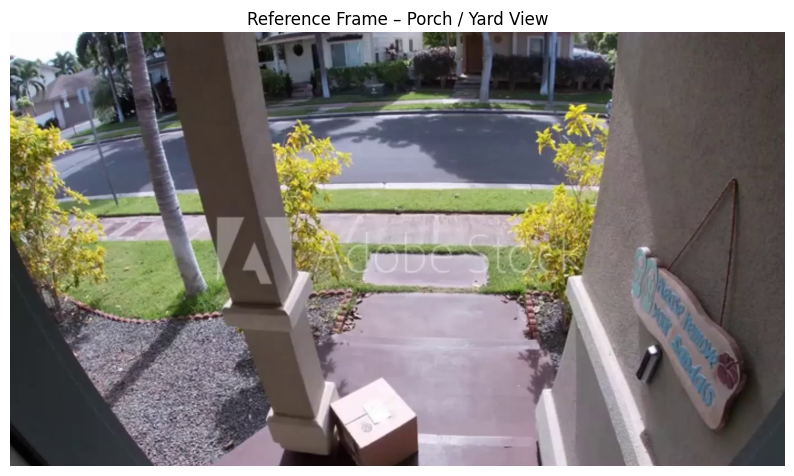

In [110]:
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.title("Reference Frame – Porch / Yard View")
plt.show()


## 🟨🔴 Step 4: Manually Define Security Zones (Yellow & Red)

This step allows you to **interactively define multiple security zones** on the reference frame using mouse clicks.

### 🎯 Zones Defined
- 🟡 **Yellow Zone 1** – Early warning region  
- 🟡 **Yellow Zone 2** – Secondary warning region  
- 🔴 **Red Zone** – Restricted / critical security region  

These zones will later be used to:
- Trigger priority-based alerts
- Detect restricted access
- Enable robbery logic

In [19]:
import cv2
import numpy as np

VIDEO_PATH = "Recording 2026-01-13 110630.mp4"

cap = cv2.VideoCapture(VIDEO_PATH)
ret, frame = cap.read()
cap.release()

if not ret:
    raise RuntimeError("Cannot read video")

yellow_zone_1 = []
yellow_zone_2 = []
red_zone = []

current_zone = "yellow1"

def mouse_callback(event, x, y, flags, param):
    global yellow_zone_1, yellow_zone_2, red_zone, current_zone

    if event == cv2.EVENT_LBUTTONDOWN:
        if current_zone == "yellow1":
            yellow_zone_1.append((x, y))
        elif current_zone == "yellow2":
            yellow_zone_2.append((x, y))
        elif current_zone == "red":
            red_zone.append((x, y))

cv2.namedWindow("Select Zones")
cv2.setMouseCallback("Select Zones", mouse_callback)

while True:
    temp = frame.copy()

    if len(yellow_zone_1) > 1:
        cv2.polylines(
            temp, [np.array(yellow_zone_1)], False, (0, 255, 255), 2
        )

    if len(yellow_zone_2) > 1:
        cv2.polylines(
            temp, [np.array(yellow_zone_2)], False, (0, 255, 200), 2
        )

    
    if len(red_zone) > 1:
        cv2.polylines(
            temp, [np.array(red_zone)], False, (0, 0, 255), 2
        )

    cv2.putText(
        temp, "Draw YELLOW ZONE 1 → Press Y to confirm",
        (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2
    )
    cv2.putText(
        temp, "Draw YELLOW ZONE 2 → Press U to confirm",
        (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,200), 2
    )
    cv2.putText(
        temp, "Draw RED ZONE → Press R to confirm",
        (20, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2
    )
    cv2.putText(
        temp, "Press Q to finish",
        (20, 120), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2
    )

    cv2.imshow("Select Zones", temp)
    key = cv2.waitKey(1) & 0xFF

    if key == ord('y'):
        current_zone = "yellow2"
        print("✅ Yellow Zone 1 saved")

    elif key == ord('u'):
        current_zone = "red"
        print("✅ Yellow Zone 2 saved")

    elif key == ord('r'):
        print("✅ Red Zone saved")

    elif key == ord('q'):
        break

cv2.destroyAllWindows()

print("\n🟡 Yellow Zone 1 Points:", yellow_zone_1)
print("🟡 Yellow Zone 2 Points:", yellow_zone_2)
print("🔴 Red Zone Points:", red_zone)


✅ Yellow Zone 1 saved
✅ Yellow Zone 2 saved
✅ Red Zone saved

🟡 Yellow Zone 1 Points: [(579, 603), (570, 599), (542, 498), (612, 475), (915, 473), (962, 484), (978, 623), (963, 675), (596, 631), (586, 611), (567, 589)]
🟡 Yellow Zone 2 Points: [(131, 503), (123, 511), (93, 532), (277, 779), (457, 721), (422, 551), (134, 497)]
🔴 Red Zone Points: [(594, 632), (600, 631), (968, 663), (964, 778), (387, 773), (465, 711), (562, 691), (590, 639), (604, 635), (610, 634)]


In [12]:
from shapely.geometry import Polygon, Point


YELLOW_ZONE_1 = Polygon([
    (554, 561), (541, 501), (556, 465), (549, 441),
    (525, 433), (515, 381), (1056, 392), (1043, 442),
    (1019, 446), (1014, 471), (1025, 513), (1009, 577)
])

YELLOW_ZONE_2 = Polygon([
    (475, 682), (469, 716), (361, 787), (262, 787),
    (86, 535), (131, 504), (239, 535), (386, 519),
    (421, 538)
])

RED_ZONE = Polygon([
    (556, 566), (1010, 578), (990, 651), (975, 651),
    (957, 685), (967, 790), (365, 785), (471, 717),
    (552, 702), (577, 643)
])

print("✅ Zones locked and ready")


✅ Zones locked and ready


## 🧠 Step 5: Priority-Based Zone Classification Logic

This step defines the **zone detection logic** for a detected person using their **bounding box**.

### 🎯 Objective
Determine **which security zone a person belongs to**, based on their bounding box position, with **strict priority rules**:

🔴 **RED zone** → Highest priority  
🟡 **YELLOW zone** → Secondary priority  
🟢 **OUTSIDE** → Default state  

⚠️ Even if a person overlaps **multiple zones**, the system will **always escalate to the highest-risk zone**.

---

### 📐 Zone Decision Rule
- If **any corner** of the person’s bounding box is inside the **RED zone** → classify as **RED**
- Else if **any corner** is inside **either Yellow Zone** → classify as **YELLOW**
- Else → **OUTSIDE**

This ensures **early and safe escalation** in real security scenarios.

In [16]:
from shapely.geometry import Point

def get_zone_from_bbox(x1, y1, x2, y2):
    """
    Priority-based zone detection:
    RED > YELLOW > OUTSIDE
    """

    
    bbox_points = [
        Point(x1, y1),  
        Point(x2, y1),  
        Point(x2, y2),  
        Point(x1, y2),  
    ]

    for pt in bbox_points:
        if RED_ZONE.contains(pt):
            return "RED"

    for pt in bbox_points:
        if YELLOW_ZONE_1.contains(pt) or YELLOW_ZONE_2.contains(pt):
            return "YELLOW"

    return "OUTSIDE"


## 🤖 Step 6: Load YOLO Model for Person Detection
## Random Frame Extraction from Video

Extracts a fixed number of high-quality frames from one or more videos to create an image dataset for annotation and training.

### 🔹 Purpose
- Convert raw manufacturing videos into individual image frames  
- Perform random sampling to avoid frame bias  
- Prepare data for annotation and YOLO training  


In [2]:
!git clone https://github.com/Labellerr/yolo_finetune_utils.git

Cloning into 'yolo_finetune_utils'...


In [3]:
from yolo_finetune_utils.frame_extractor import extract_random_frames

extract_random_frames(
    paths=["Recording 2026-01-13 110630.mp4"],
    total_images=50,
    out_dir="data/frames",
    jpg_quality=100,
    seed=42
)

[✓] Extracted 50 frames to folder: data/frames


## 📥 Download Annotations from Labellerr

After completing data labeling on the **Labellerr** platform, export the annotations in **COCO JSON format**.

Download the COCO JSON file from the Labellerr website and upload it into this project workspace to use it for further dataset preparation and training.

This COCO JSON file will be used in the next steps for:
- Frame–annotation alignment
- COCO → YOLO format conversion
- Model training and evaluation


In [ ]:
from yolo_finetune_utils.coco_yolo_converter.seg_converter import coco_to_yolo_converter

coco_to_yolo_converter(
    json_path="annotations/export-#QhnW4ewqwaZwPkzCpvYS.json",
    images_dir="data/frames",
    output_dir="yolo_dataset",
    use_split=True,
    train_ratio=0.7,
    val_ratio=0.2,
    test_ratio=0.1,
    shuffle=True,
    verbose=True
)


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt")

model.train(
    data="yolo_dataset/data.yaml",
    epochs=25,
    imgsz=640,
    batch=2,
    device="cpu",
    workers=2
)

In [115]:
import time
import os

os.makedirs("outputs/evidence", exist_ok=True)

red_alert_triggered = False
theft_confirmed = False


## 📦 Step 7: Manually Define Package Polygon (Baseline Object)

This step allows you to **manually mark the package (box) region** in the reference frame.  
The selected polygon represents the **baseline object position**, which will later be monitored to detect **robbery or object removal**.

### 🎯 Objective
- Accurately outline the package using multiple points
- Capture the exact shape and footprint of the box
- Use this polygon for baseline comparison during inference

---

### 🖱️ Controls
- **Left Mouse Click** → Add polygon points around the package  
- **Q** → Finish polygon selection  

📌 Recommended:
- Select **5–6 points** closely around the box edges
- Avoid including unnecessary floor/background area

In [20]:
import cv2
import numpy as np

VIDEO_PATH = "Recording 2026-01-13 110630.mp4"

cap = cv2.VideoCapture(VIDEO_PATH)
ret, frame = cap.read()
cap.release()

if not ret:
    raise RuntimeError("Cannot read video")

package_points = []

def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        package_points.append((x, y))

cv2.namedWindow("Select Package Polygon")
cv2.setMouseCallback("Select Package Polygon", mouse_callback)

while True:
    temp = frame.copy()

    if len(package_points) > 1:
        cv2.polylines(
            temp,
            [np.array(package_points)],
            False,
            (255, 255, 0),
            2
        )

    cv2.putText(
        temp,
        "Click 5-6 points around box | Press Q when done",
        (20, 30),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (255, 255, 0),
        2
    )

    cv2.imshow("Select Package Polygon", temp)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cv2.destroyAllWindows()

print("📦 PACKAGE_POLYGON_POINTS =", package_points)


📦 PACKAGE_POLYGON_POINTS = [(566, 739), (536, 771), (770, 775), (775, 655), (683, 607), (567, 647), (566, 739)]


In [117]:
from shapely.geometry import Polygon

PACKAGE_POLYGON_POINTS = [
    (677, 630), (676, 632), (582, 679),
    (602, 747), (630, 788), (700, 791),
    (743, 767), (741, 700), (677, 631)
]

PACKAGE_POLYGON = Polygon(PACKAGE_POLYGON_POINTS)

print("✅ Package polygon locked")


✅ Package polygon locked


In [118]:
def package_center_from_polygon(poly):
    c = poly.centroid
    return int(c.x), int(c.y)

PACKAGE_CENTER = package_center_from_polygon(PACKAGE_POLYGON)
print("🎯 Package center:", PACKAGE_CENTER)


🎯 Package center: (666, 718)


## 📦 Step 8: Package Visibility Check (Object Presence Logic)

This step defines a function to determine whether the **package is still present** inside its predefined polygon region.

Instead of tracking the object explicitly, we use a **region-based visibility heuristic**, which is:
- Simple
- Fast
- Robust for static objects like packages

---

### 🧠 How It Works
1. Create a **binary mask** from the package polygon
2. Extract only the region of interest (ROI)
3. Convert the ROI to grayscale
4. Compute the **average pixel intensity**
5. If the intensity drops below a threshold → object is considered **removed**

In [121]:
import cv2
import numpy as np

def package_removed(frame, baseline_gray, polygon, diff_thresh=25):
    """
    Returns True if the package is visually removed
    polygon = Shapely Polygon
    """

    # Convert current frame to gray
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Create mask
    mask = np.zeros(gray.shape, dtype=np.uint8)

    # ✅ FIX: extract coordinates from Shapely polygon
    pts = np.array(list(polygon.exterior.coords), dtype=np.int32)

    cv2.fillPoly(mask, [pts], 255)

    # Extract ROIs
    curr_roi = cv2.bitwise_and(gray, gray, mask=mask)
    base_roi = cv2.bitwise_and(baseline_gray, baseline_gray, mask=mask)

    # Compute difference
    diff = cv2.absdiff(curr_roi, base_roi)
    mean_diff = diff.mean()

    return mean_diff > diff_thresh


In [120]:
robbery_triggered = False
person_in_red = False


In [122]:
cap = cv2.VideoCapture(VIDEO_PATH)
ret, baseline_frame = cap.read()
cap.release()

if not ret:
    raise RuntimeError("❌ Could not read baseline frame")

BASELINE_GRAY = cv2.cvtColor(baseline_frame, cv2.COLOR_BGR2GRAY)


In [123]:
robbery_triggered = False
missing_counter = 0
MISSING_FRAMES_REQUIRED = 5


## 🎥 Step 9: Initialize Video Writer (Output Video Setup)

In this step, we initialize the **output video writer** to store the final annotated results, including:
- Zone overlays (Yellow / Red)
- Person tracking
- Alerts
- Robbery detection evidence

This step is **critical** — if configured incorrectly, the output video may be empty, corrupted, or 0 seconds long.


In [10]:
VIDEO_PATH = "Recording 2026-01-13 110630.mp4"
cap = cv2.VideoCapture(VIDEO_PATH)

fps = cap.get(cv2.CAP_PROP_FPS)
if fps == 0:
    fps = 25

W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*"XVID")
out = cv2.VideoWriter("outputs/rob_Output.avi", fourcc, fps, (W,H))

assert out.isOpened(), "VideoWriter failed"


## 🚨 Step 10: Final Inference Loop — Zone Monitoring & Robbery Detection

This is the **core execution loop** of the Smart Robbery Detection system.  
Each video frame is processed in real-time to:

- Overlay security zones (Yellow / Red)
- Track people using YOLO
- Apply **priority-based zone logic**
- Monitor package presence
- Confirm robbery using **temporal evidence**
- Write annotated frames to output video

In [ ]:
import numpy as np
import cv2

def draw_zone_overlay(frame, polygon, color, alpha=0.3):
    """
    Draws a transparent polygon overlay on the frame.
    
    frame   : input image
    polygon : shapely Polygon
    color   : BGR tuple
    alpha   : transparency (0–1)
    """
    overlay = frame.copy()
    pts = np.array(list(polygon.exterior.coords), dtype=np.int32)
    cv2.fillPoly(overlay, [pts], color)
    cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)

    return frame


In [ ]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 🔶 Draw zones
    frame = draw_zone_overlay(frame, YELLOW_ZONE_1, (0,255,255), 0.25)
    frame = draw_zone_overlay(frame, YELLOW_ZONE_2, (0,255,255), 0.25)
    frame = draw_zone_overlay(frame, RED_ZONE, (0,0,255), 0.30)

    results = model.track(frame, persist=True, conf=0.4, classes=[0], verbose=False)
    person_in_red = False

    for r in results:
        if r.boxes is None:
            continue

        for box in r.boxes:
            x1,y1,x2,y2 = map(int, box.xyxy[0])
            zone = get_zone_from_bbox(x1,y1,x2,y2)

            if zone == "RED":
                color = (0,0,255)
                label = "🚨 RED ZONE"
                person_in_red = True
            elif zone == "YELLOW":
                color = (0,255,255)
                label = "⚠ YELLOW"
            else:
                color = (0,255,0)
                label = "OUTSIDE"

            cv2.rectangle(frame,(x1,y1),(x2,y2),color,2)
            cv2.putText(frame,label,(x1,y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX,0.6,color,2)

    if package_still_present:
        cx,cy = PACKAGE_CENTER
        cv2.circle(frame,(cx,cy),6,(255,255,0),-1)


    if not robbery_triggered:
     if package_removed(frame, BASELINE_GRAY, PACKAGE_POLYGON):
        missing_counter += 1

        if missing_counter >= MISSING_FRAMES_REQUIRED:
            robbery_triggered = True
            cv2.imwrite(
                f"outputs/evidence/robbery_{int(time.time())}.jpg",
                frame
            )
            print("🚨 ROBBERY CONFIRMED")
     else:
        missing_counter = 0


    y = 30
    if person_in_red:
        cv2.putText(frame,"RED ZONE BREACH",(20,y),
                    cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255),2)
        y += 30

    if robbery_triggered:
        cv2.putText(frame,"🚨 ROBBERY DETECTED",(20,y),
                    cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,0,255),3)

    out.write(frame)


## 🧹 Step 11: Release Resources & Finalize Output

After processing all frames and writing the annotated video,  
it is important to **properly release system resources** to avoid file corruption and memory leaks.

This step ensures:
- The output video is finalized correctly
- The video file is playable
- All OpenCV windows are closed safely

In [128]:
cap.release()
out.release()
cv2.destroyAllWindows()


## 👨‍💻 About Labellerr's Hands-On Learning in Computer Vision

Thank you for exploring this **Labellerr Hands-On Computer Vision Cookbook**! We hope this notebook helped you learn, prototype, and accelerate your vision projects.  
Labellerr provides ready-to-run Jupyter/Colab notebooks for the latest models and real-world use cases in computer vision, AI agents, and data annotation.

---
## 🧑‍🔬 Check Our Popular Youtube Videos

Whether you're a beginner or a practitioner, our hands-on training videos are perfect for learning custom model building, computer vision techniques, and applied AI:

- [How to Fine-Tune YOLO on Custom Dataset](https://www.youtube.com/watch?v=pBLWOe01QXU)  
  Step-by-step guide to fine-tuning YOLO for real-world use—environment setup, annotation, training, validation, and inference.
- [Build a Real-Time Intrusion Detection System with YOLO](https://www.youtube.com/watch?v=kwQeokYDVcE)  
  Create an AI-powered system to detect intruders in real time using YOLO and computer vision.
- [Finding Athlete Speed Using YOLO](https://www.youtube.com/watch?v=txW0CQe_pw0)  
  Estimate real-time speed of athletes for sports analytics.
- [Object Counting Using AI](https://www.youtube.com/watch?v=smsjBBQcIUQ)  
  Learn dataset curation, annotation, and training for robust object counting AI applications.
---

## 🎦 Popular Labellerr YouTube Videos

Level up your skills and see video walkthroughs of these tools and notebooks on the  
[Labellerr YouTube Channel](https://www.youtube.com/@Labellerr/videos):

- [How I Fixed My Biggest Annotation Nightmare with Labellerr](https://www.youtube.com/watch?v=hlcFdiuz_HI) – Solving complex annotation for ML engineers.
- [Explore Your Dataset with Labellerr's AI](https://www.youtube.com/watch?v=LdbRXYWVyN0) – Auto-tagging, object counting, image descriptions, and dataset exploration.
- [Boost AI Image Annotation 10X with Labellerr's CLIP Mode](https://www.youtube.com/watch?v=pY_o4EvYMz8) – Refine annotations with precision using CLIP mode.
- [Boost Data Annotation Accuracy and Efficiency with Active Learning](https://www.youtube.com/watch?v=lAYu-ewIhTE) – Speed up your annotation workflow using Active Learning.

> 👉 **Subscribe** for Labellerr's deep learning, annotation, and AI tutorials, or watch videos directly alongside notebooks!

---

## 🤝 Stay Connected

- **Website:** [https://www.labellerr.com/](https://www.labellerr.com/)
- **Blog:** [https://www.labellerr.com/blog/](https://www.labellerr.com/blog/)
- **GitHub:** [Labellerr/Hands-On-Learning-in-Computer-Vision](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)
- **LinkedIn:** [Labellerr](https://in.linkedin.com/company/labellerr)
- **Twitter/X:** [@Labellerr1](https://x.com/Labellerr1)

*Happy learning and building with Labellerr!*


In [1]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
print("✅ YOLO loaded (person + package classes)")


✅ YOLO loaded (person + package classes)
